In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the datasets into pandas dataframes
icu_df = pd.read_csv("C:\\Users\\EmilySia\\Downloads\\icu.csv")
vax_df = pd.read_csv("C:\\Users\\EmilySia\\Downloads\\vax_malaysia.csv")
cases_df = pd.read_csv("C:\\Users\\EmilySia\\Downloads\\cases_malaysia.csv")

icu_df = icu_df.drop('state',axis=1)
icu_df = icu_df.groupby('date').sum()

# Merge the dataframes on the "date" column
merge1 = pd.merge(cases_df, icu_df, on="date",how="outer")
covid_df = pd.merge(merge1, vax_df, on="date",how="outer")


print(covid_df)

            date  cases_new  cases_import  cases_recovered  cases_active  \
0     2020-01-25        4.0           4.0              0.0           4.0   
1     2020-01-26        0.0           0.0              0.0           4.0   
2     2020-01-27        0.0           0.0              0.0           4.0   
3     2020-01-28        0.0           0.0              0.0           4.0   
4     2020-01-29        3.0           3.0              0.0           7.0   
...          ...        ...           ...              ...           ...   
1193  2023-05-02        NaN           NaN              NaN           NaN   
1194  2023-05-03        NaN           NaN              NaN           NaN   
1195  2023-05-04        NaN           NaN              NaN           NaN   
1196  2023-05-05        NaN           NaN              NaN           NaN   
1197  2023-05-06        NaN           NaN              NaN           NaN   

      cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0        

In [5]:
pd.set_option('display.max_rows',100)
print(covid_df.columns)
missing = covid_df.isna().sum()
print(missing)

Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace',
       'beds_icu', 'beds_icu_rep', 'beds_icu_total', 'beds_icu_covid', 'vent',
       'vent_port', 'icu_covid', 'icu_pui', 'icu_noncovid', 'vent_covid',
       'vent_pui', 'vent_noncovid', 'vent_used', 'vent_port_used',
       'daily_partial', 'daily_full', 'daily_booster', 'daily_booster2',
       'daily', 'daily_partial_adol', 'daily_full_adol', 'daily_booster_adol',
       'daily_booster2_adol', 'daily_partial_child', 'daily_full_

In [6]:
covid_df.dropna(inplace=True)
print(covid_df)

            date  cases_new  cases_import  cases_recovered  cases_active  \
396   2021-02-24     3545.0           1.0           3331.0       30673.0   
397   2021-02-25     1924.0           6.0           3752.0       28832.0   
398   2021-02-26     2253.0           7.0           3085.0       27990.0   
399   2021-02-27     2364.0           1.0           3320.0       27024.0   
400   2021-02-28     2437.0           1.0           3251.0       26201.0   
...          ...        ...           ...              ...           ...   
1186  2023-04-25      561.0           3.0            782.0       13575.0   
1187  2023-04-26      617.0           2.0            809.0       13383.0   
1188  2023-04-27      832.0           4.0            762.0       13449.0   
1189  2023-04-28     1067.0           0.0            673.0       13841.0   
1190  2023-04-29     1050.0           1.0            600.0       14291.0   

      cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
396      

#df2 is a copy of original combined dataset covid_df which is used to identify the cumulative frequency of each month in a year

In [7]:
# Convert the date column to datetime format
df2 = covid_df.copy()
df2['date'] = pd.to_datetime(df2['date'])

# Create a new column with the month for each date
df2['month'] = df2['date'].dt.strftime('%Y-%m')

#Find the data of march and print the result
mar_2021_df = df2[df2['month'] == '2021-02']
print(mar_2021_df['cumul_full'])


396     3.0
397     5.0
398     8.0
399    14.0
400    20.0
Name: cumul_full, dtype: float64


# Occupancy of ICU Beds for COVID-19 Patients vs Fully vaccinated culmulative frequency over Time (2022)

In [8]:
# Filter the data for the year 2022
df_2022 = df2.loc[(df2['date'].dt.year == 2022) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
#print(df_2022)

# Convert the date column to datetime format
df_2022['date'] = pd.to_datetime(df_2022['date'])

# Create a new column with the month for each date
df_2022['month'] = df_2022['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2022 = df_2022.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2022['beds_icu_covid'])

month
2022-01    28206.0
2022-02    23637.0
2022-03    27307.0
2022-04    24456.0
2022-05    19209.0
2022-06    13323.0
2022-07    12605.0
2022-08    11585.0
2022-09    11050.0
2022-10    11294.0
2022-11    10765.0
2022-12    11248.0
Name: beds_icu_covid, dtype: float64


C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\468227126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['date'] = pd.to_datetime(df_2022['date'])
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\468227126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['date'].dt.strftime('%Y-%m')
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\468227126.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version,

In [9]:
df5 = covid_df.copy()
df5['date'] = pd.to_datetime(covid_df['date'])
df5['year'] = df5['date'].dt.year
df5['month'] = df5['date'].dt.month

df_grouped = df5.groupby(['year','month'])['cumul_full'].agg('last').reset_index()
print(df_grouped.columns)

# Filter the data for the year 2022
df_2022 = df_grouped.loc[df_grouped['year'] == 2022].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2022)

Index(['year', 'month', 'cumul_full'], dtype='object')
    year  month  cumul_full
0   2022      1  25747631.0
1   2022      2  25786066.0
2   2022      3  25840007.0
3   2022      4  26767036.0
4   2022      5  27115288.0
5   2022      6  27306895.0
6   2022      7  27471268.0
7   2022      8  27508481.0
8   2022      9  27521121.0
9   2022     10  27528536.0
10  2022     11  27533137.0
11  2022     12  27537575.0


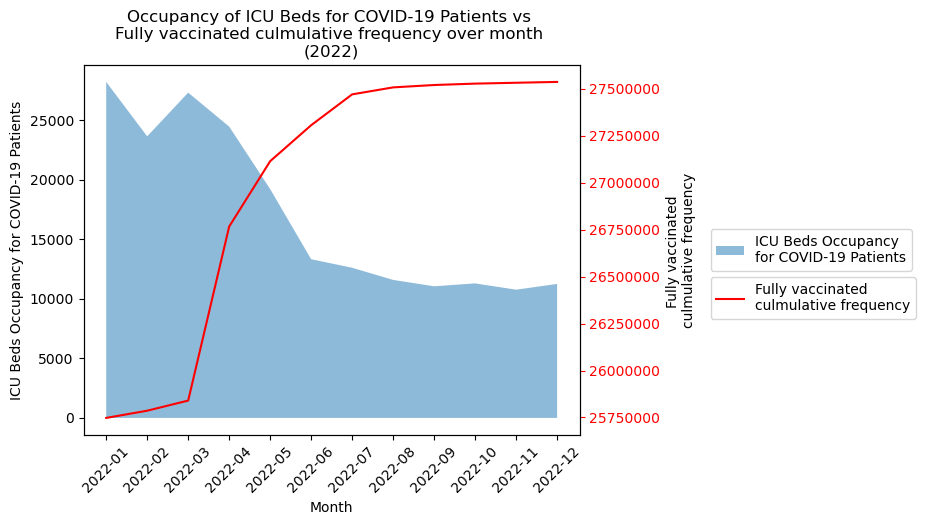

In [15]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2022.index, monthly_sum_2022['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over month \n(2022)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax2.ticklabel_format(style='plain', axis='y')

# Plot the data for vaccination rate
ax2.plot(df_2022.index, df_2022['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency',)

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

# Occupancy of ICU Beds for COVID-19 Patients vs Fully vaccinated culmulative frequency over Time (2021)

In [16]:
# Filter the data for the year 2021
df_2021 = df2.loc[(df2['date'].dt.year == 2021) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
print(df_2021)

# Convert the date column to datetime format
df_2021['date'] = pd.to_datetime(df_2021['date'])

# Create a new column with the month for each date
df_2021['month'] = df_2021['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2021 = df_2021.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2021['cumul_full'])

          date  cases_new  cases_import  cases_recovered  cases_active  \
396 2021-02-24     3545.0           1.0           3331.0       30673.0   
397 2021-02-25     1924.0           6.0           3752.0       28832.0   
398 2021-02-26     2253.0           7.0           3085.0       27990.0   
399 2021-02-27     2364.0           1.0           3320.0       27024.0   
400 2021-02-28     2437.0           1.0           3251.0       26201.0   
..         ...        ...           ...              ...           ...   
702 2021-12-27     2757.0         147.0           4620.0       42917.0   
703 2021-12-28     2897.0         192.0           3434.0       42357.0   
704 2021-12-29     3683.0         239.0           4322.0       41682.0   
705 2021-12-30     3997.0         366.0           3984.0       41661.0   
706 2021-12-31     3573.0         343.0           3988.0       41221.0   

     cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
396         2483.0       3545.0   

C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\283709592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['date'] = pd.to_datetime(df_2021['date'])
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\283709592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['month'] = df_2021['date'].dt.strftime('%Y-%m')
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\283709592.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version,

In [35]:
# Filter the data for the year 2021
df_2021 = df_grouped.loc[df_grouped['year'] == 2021].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2021)

    year  month  cumul_full
0   2021      2        20.0
1   2021      3    219086.0
2   2021      4    561342.0
3   2021      5   1094954.0
4   2021      6   2343373.0
5   2021      7   6914329.0
6   2021      8  15341284.0
7   2021      9  20915423.0
8   2021     10  24831889.0
9   2021     11  25503163.0
10  2021     12  25666548.0


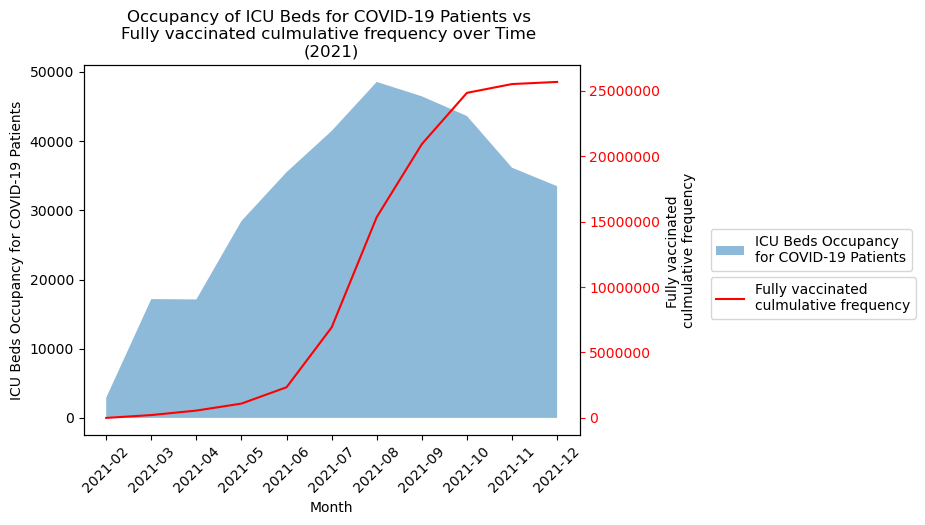

In [18]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2021.index, monthly_sum_2021['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over Time \n(2021)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

# Plot the data for vaccination rate
ax2.plot(df_2021.index, df_2021['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency')

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

In [19]:
# Filter the data for the year 2022
df_2023 = df2.loc[(df2['date'].dt.year == 2023) & (df2['date'].dt.month.between(1, 12))]

# Print the resulting DataFrame
#print(df_2022)

# Convert the date column to datetime format
df_2023['date'] = pd.to_datetime(df_2023['date'])

# Create a new column with the month for each date
df_2023['month'] = df_2023['date'].dt.strftime('%Y-%m')

# Group the data by month and sum the values for each month
monthly_sum_2023 = df_2023.groupby('month').sum()

# Print the resulting dataframe
print(monthly_sum_2023['cumul_full'])

# Filter the data for the year 2022
df_2023 = df_grouped.loc[df_grouped['year'] == 2023].reset_index(drop=True)

# Print the resulting DataFrame
print(df_2023)

month
2023-01    633415578.0
2023-02    550860289.0
2023-03    633552188.0
2023-04    578499267.0
Name: cumul_full, dtype: float64
   year  month  cumul_full
0  2023      1  27541179.0
1  2023      2  27544086.0
2  2023      3  27546649.0
3  2023      4  27548216.0


C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\3171222431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['date'] = pd.to_datetime(df_2023['date'])
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\3171222431.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['date'].dt.strftime('%Y-%m')
C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\3171222431.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future versi

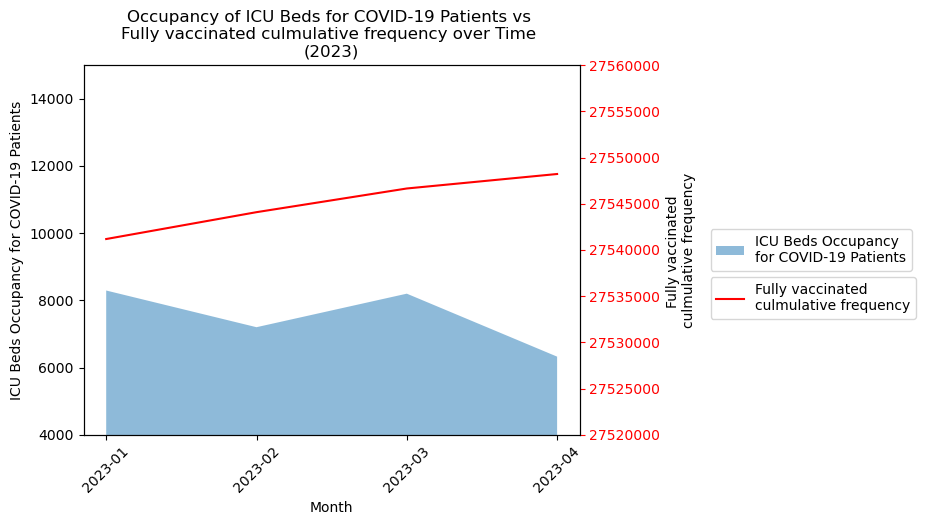

In [20]:
# Plot the data for ICU beds occupancy
fig, ax1 = plt.subplots()
ax1.fill_between(monthly_sum_2023.index, monthly_sum_2023['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
ax1.set_xlabel('Month')
ax1.set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
ax1.set_title('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over Time \n(2023)')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Create a twin axis for vaccination rate
ax2 = ax1.twinx()
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)
# Set axis color to green
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax1.set_ylim(4000, 15000)
ax2.set_ylim(27520000, 27560000)

# Plot the data for vaccination rate
ax2.plot(df_2023.index, df_2023['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated \nculmulative frequency')

# Add a legend for both axes
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.37))

# Show the plot
plt.show()

In [34]:
# Filter the data for the years 2021 to 2023
df_2021_2023 = df2.loc[(df2['date'].dt.year.between(2021, 2023))]

# Convert the date column to datetime format
df_2021_2023['date'] = pd.to_datetime(df_2021_2023['date'])

# Create a new column with the year for each date
df_2021_2023['year'] = df_2021_2023['date'].dt.strftime('%Y')

# Group the data by year and month, and sum the values for each month and year
yearly_sum = df_2021_2023.groupby(['year']).sum()

# Print the resulting dataframe for a specific column, e.g. 'cumul_full'
print(yearly_sum["cumul_full"])

# Filter the data for the year 2022
#df_2021_2023 = df_grouped_by_year.loc[df_grouped_by_year['year']].reset_index(drop=True)

# Print the resulting DataFrame
#print(df_2021_2023)


year
2021    3.388631e+09
2022    9.818313e+09
2023    2.396327e+09
Name: cumul_full, dtype: float64


C:\Users\EmilySia\AppData\Local\Temp\ipykernel_3868\2960172272.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sum = df_2021_2023.groupby(['year']).sum()


In [24]:
df5 = covid_df.copy()
df5['date'] = pd.to_datetime(covid_df['date'])
df5['year'] = df5['date'].dt.year
df5['month'] = df5['date'].dt.month

df_grouped_by_year = df5.groupby(['year'])['cumul_full'].agg('last').reset_index()
df_grouped_by_year

,year,cumul_full
0,2021,25666548.0
1,2022,27537575.0
2,2023,27548216.0


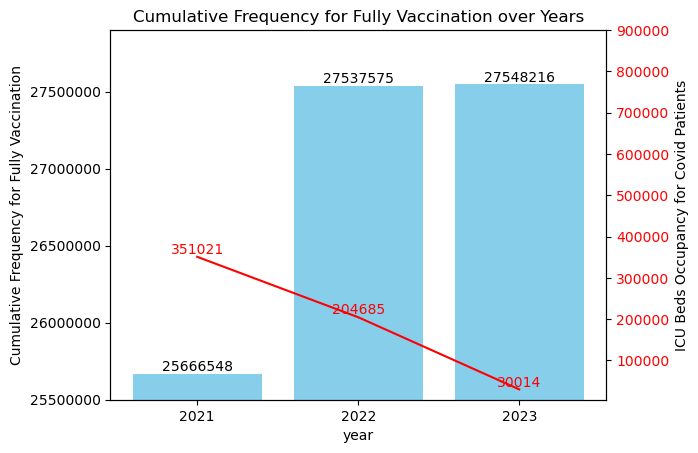

In [33]:
# Plot bar graph for cumul_full
plt.bar(df_grouped_by_year.index, df_grouped_by_year['cumul_full'], color='skyblue')
plt.xlabel('year')
plt.ylabel('Cumulative Frequency for Fully Vaccination')
plt.title('Cumulative Frequency for Fully Vaccination over Years')

for i, val in enumerate(df_grouped_by_year['cumul_full']):
    plt.text(i, val+5, int(val), color='k', ha='center', va='bottom')

plt.ticklabel_format(style='plain', axis='y')
plt.ylim(25500000, 27900000)

# Create twin y-axis for beds_icu_covid
ax2 = plt.twinx()
ax2.set_ylim(5000, 900000)

# Show the frequency on the ax2 graph
for i, val in enumerate(yearly_sum['beds_icu_covid']):
    ax2.text(i, val+5, int(val), color='r', ha='center', va='bottom')

# Plot line graph for beds_icu_covid
ax2.plot(yearly_sum.index, yearly_sum['beds_icu_covid'], color='r')
ax2.set_ylabel('ICU Beds Occupancy for Covid Patients')
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis tick labels to show only the month
plt.xticks(yearly_sum.index, rotation=45)

# Show the plot
plt.show()

<Axes: >

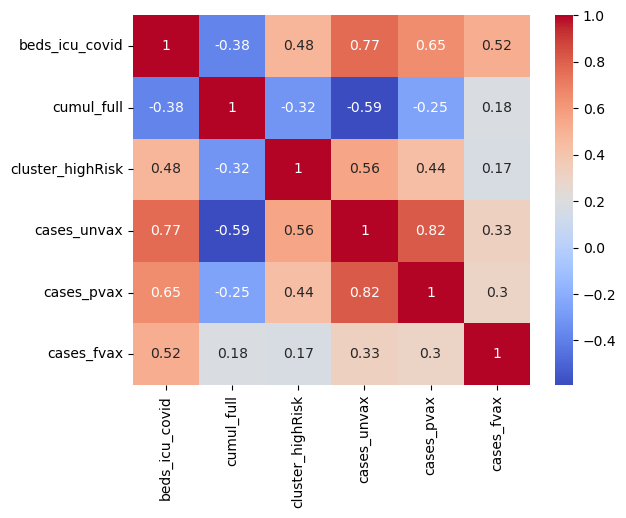

In [28]:
import seaborn as sns

# Create a correlation matrix for relevant variables
corr_matrix = covid_df[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


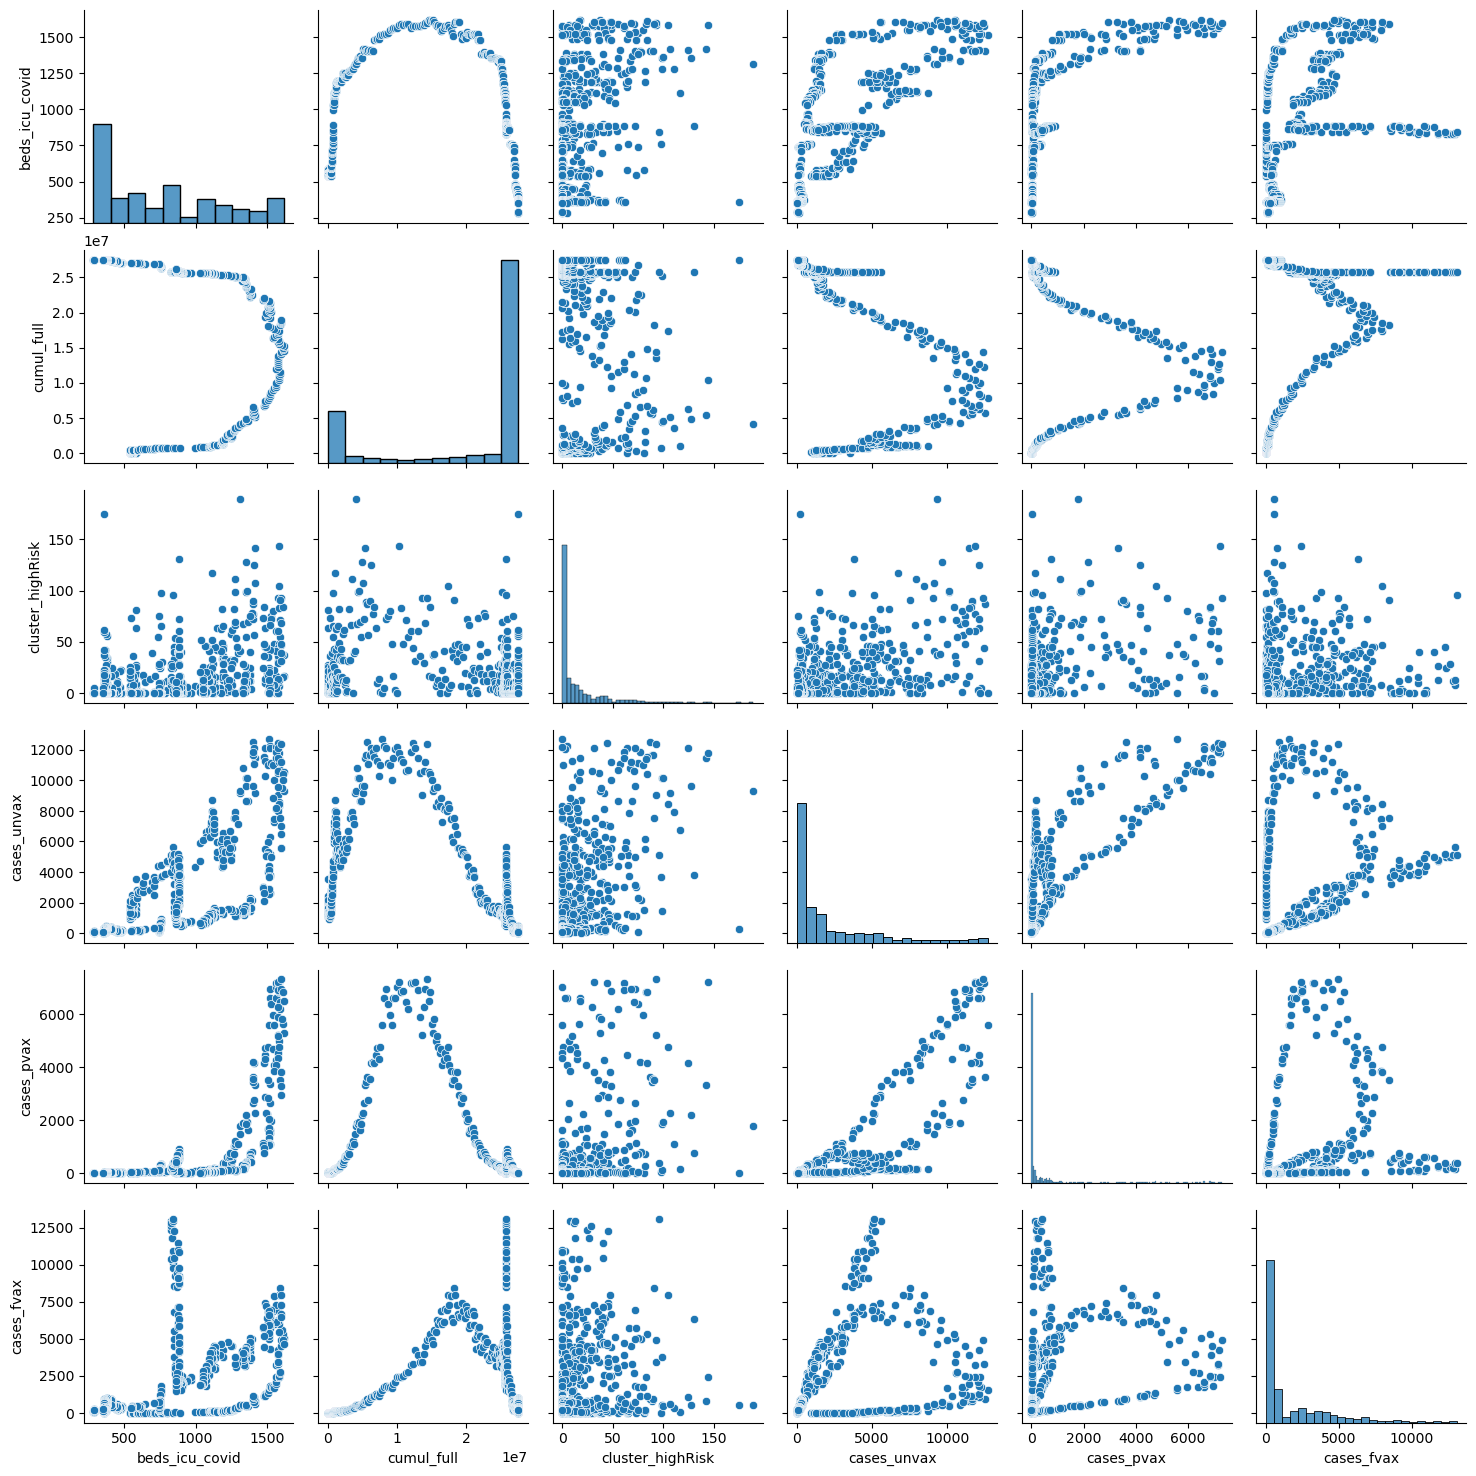

In [30]:
# Create a pairplot of relevant variables
sns.pairplot(covid_df[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']])
plt.show()

In [31]:
covid_df.describe()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,6252.796855,47.617300,6228.642202,73421.010485,520.148100,2262.939712,571.197903,1792.774574,1625.884666,805.660550,...,21.000000,12.920052,0.152031,285.990826,10.643512,0.339450,14.339450,9.503277,3.623853,0.807339
std,7216.386669,110.730527,7129.604233,79849.438050,793.058856,3093.024892,1446.572276,2615.866315,3186.410824,1013.131196,...,56.952206,35.290994,0.520403,953.571764,43.279095,2.086415,49.356078,28.414506,16.080630,7.122907
min,101.000000,0.000000,0.000000,8961.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1682.500000,3.000000,1773.000000,23110.500000,4.000000,179.000000,10.000000,121.000000,0.000000,127.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3304.000000,7.000000,3331.000000,40102.000000,111.000000,803.000000,25.000000,481.000000,296.000000,325.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6836.500000,20.000000,6789.000000,79686.500000,679.000000,3214.500000,262.500000,2669.500000,1632.500000,1000.000000,...,3.000000,3.000000,0.000000,93.000000,1.000000,0.000000,3.000000,4.000000,1.000000,0.000000
max,33406.000000,719.000000,33872.000000,323785.000000,3394.000000,12682.000000,7316.000000,13061.000000,18165.000000,4389.000000,...,388.000000,255.000000,6.000000,7745.000000,521.000000,39.000000,504.000000,379.000000,194.000000,134.000000


In [123]:
df[['beds_icu_covid', 'cumul_full', 'cluster_highRisk', 'cases_unvax', 'cases_pvax', 'cases_fvax']].describe().applymap(lambda x: format(x, '.2f'))


,beds_icu_covid,cumul_full,cluster_highRisk,cases_unvax,cases_pvax,cases_fvax
count,763.00,763.00,763.00,763.00,763.00,763.00
mean,767.65,20449897.48,15.57,2262.94,571.20,1792.77
std,412.91,10389676.39,25.76,3093.02,1446.57,2615.87
min,282.00,3.00,0.00,10.00,0.00,0.00
25%,367.00,15880176.00,0.00,179.00,10.00,121.00
50%,634.00,25806602.00,3.00,803.00,25.00,481.00
75%,1115.00,27516314.00,19.00,3214.50,262.50,2669.50
max,1620.00,27548216.00,189.00,12682.00,7316.00,13061.00


Text(0, 0.5, 'Fully vaccinated culmulative frequency')

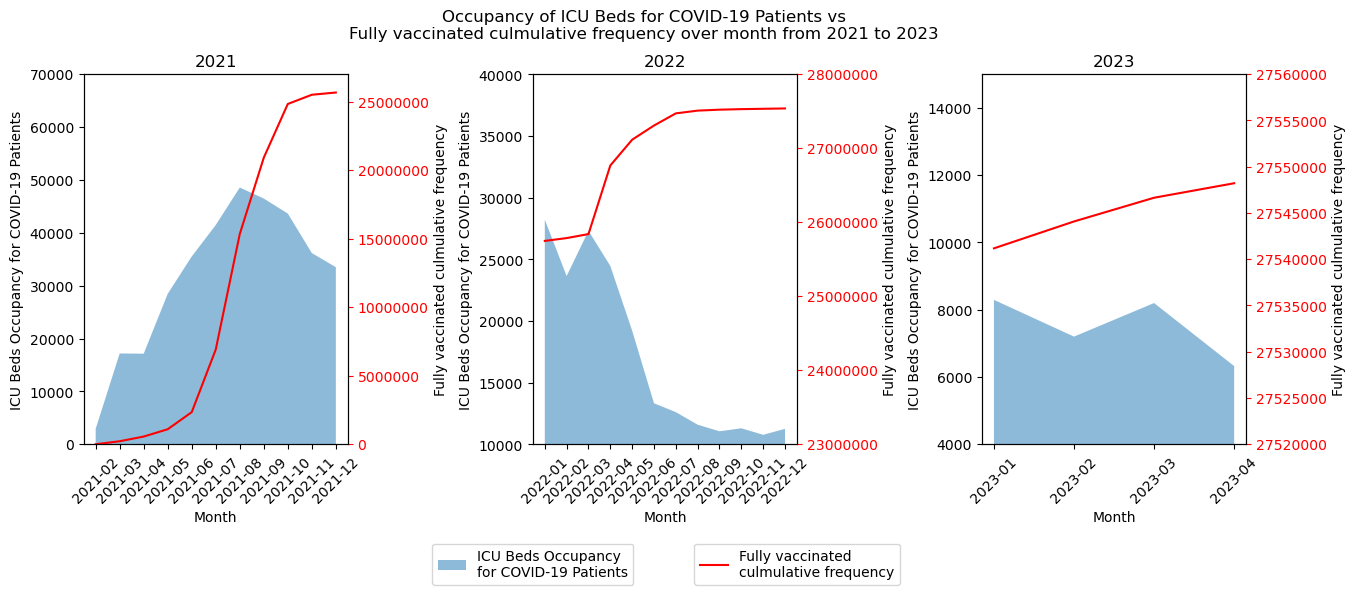

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Occupancy of ICU Beds for COVID-19 Patients vs \nFully vaccinated culmulative frequency over month from 2021 to 2023 ')
# Set the spacing between subplots and figure edges
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)

# Add space after the suptitle
plt.subplots_adjust(top=0.85)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

# First subplot
axs[0].fill_between(monthly_sum_2021.index, monthly_sum_2021['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[0].set_title('2021')

# Rotate the x-axis labels by 45 degrees
axs[0].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[0].twinx()
ax2.tick_params(axis='y', labelcolor='r', colors='r')
ax2.ticklabel_format(style='plain', axis='y')

# Plot the data for vaccination rate
ax2.plot(df_2021.index, df_2021['cumul_full'], color='r', label='Fully vaccinated culmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency',)

axs[0].set_ylim(0, 70000)
ax2.set_ylim(0, 27000000)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Second subplot
axs[1].fill_between(monthly_sum_2022.index, monthly_sum_2022['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[1].set_title('2022')

# Rotate the x-axis labels by 45 degrees
axs[1].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[1].twinx()
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

# Plot the data for vaccination rate
ax2.plot(df_2022.index, df_2022['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency')

# Add a legend for both axes
axs[1].legend(loc='upper center', bbox_to_anchor=(0, -0.25))
ax2.legend(loc='upper center', bbox_to_anchor=(1, -0.25))

axs[1].set_ylim(10000, 40000)
ax2.set_ylim(23000000, 28000000)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Third subplot
axs[2].fill_between(monthly_sum_2023.index, monthly_sum_2023['beds_icu_covid'], alpha=0.5, label='ICU Beds Occupancy \nfor COVID-19 Patients')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('ICU Beds Occupancy for COVID-19 Patients')
axs[2].set_title('2023')

# Rotate the x-axis labels by 45 degrees
axs[2].tick_params(axis='x', rotation=45)

# Create a twin axis for vaccination rate
ax2 = axs[2].twinx()
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)
ax2.tick_params(axis='y', labelcolor='r', colors='r')
axs[2].set_ylim(4000, 15000)
ax2.set_ylim(27520000, 27560000)

# Plot the data for vaccination rate
ax2.plot(df_2023.index, df_2023['cumul_full'], color='r', label='Fully vaccinated \nculmulative frequency')
ax2.set_ylabel('Fully vaccinated culmulative frequency')


# Some python variables description

icu_df	= icu.csv
vax_df	= vaccination.csv
cases_df	= cases.csv
covid_df	= dataset that combined 3 different datasets with removing 'state' variable

df2	= a copy of covid_df to identify the cumulative frequency of beds_icu_covid for graph plotting

df_2022, df_2021, df_2020 = beds_icu_covid and cumul_full for the particular year

df5	= a copy of covid_df to identify the last value of each month for the 'cumul_full' to obtain the cumulative frequency of number of full vaccination in the particular month